In [15]:
# Cell 0 - SETUP (RUN THIS FIRST!)
import os

# Create all required folders
os.makedirs('../reports/figures', exist_ok=True)
os.makedirs('../data/processed', exist_ok=True)

print("✅ All folders created successfully!")
print(f"📁 Reports folder: {os.path.abspath('../reports/figures')}")

✅ All folders created successfully!
📁 Reports folder: c:\Users\Icey_m_a\Documents\Icey\Icey\School\Python\Employee Attrition Prediction Model\reports\figures


In [16]:
# 01_eda_attrition.ipynb - Cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for professional charts
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Import your preprocessing module
import sys
sys.path.append('..')  # Add parent directory to path
from src.data.preprocessing import load_raw_data

print("✅ Imports successful")
print(f"✅ Matplotlib version: {plt.matplotlib.__version__}")
print(f"✅ Seaborn version: {sns.__version__}")

✅ Imports successful
✅ Matplotlib version: 3.10.8
✅ Seaborn version: 0.13.2


In [17]:
# Cell 2 - Load data
df = load_raw_data()
print("\n✅ Data loaded successfully")
print(f"First 5 rows:")
df.head()

✅ Dataset loaded successfully!
   Shape: (1470, 35)
   Attrition distribution:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

✅ Data loaded successfully
First 5 rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
# Cell 3 - Basic info
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)

print(f"\n📊 Shape: {df.shape}")
print(f"\n📋 Columns:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\n📈 Data Types:")
print(df.dtypes.value_counts())

print(f"\n🔍 Missing Values: {df.isnull().sum().sum()}")

DATASET INFORMATION

📊 Shape: (1470, 35)

📋 Columns:
   1. Age
   2. Attrition
   3. BusinessTravel
   4. DailyRate
   5. Department
   6. DistanceFromHome
   7. Education
   8. EducationField
   9. EmployeeCount
  10. EmployeeNumber
  11. EnvironmentSatisfaction
  12. Gender
  13. HourlyRate
  14. JobInvolvement
  15. JobLevel
  16. JobRole
  17. JobSatisfaction
  18. MaritalStatus
  19. MonthlyIncome
  20. MonthlyRate
  21. NumCompaniesWorked
  22. Over18
  23. OverTime
  24. PercentSalaryHike
  25. PerformanceRating
  26. RelationshipSatisfaction
  27. StandardHours
  28. StockOptionLevel
  29. TotalWorkingYears
  30. TrainingTimesLastYear
  31. WorkLifeBalance
  32. YearsAtCompany
  33. YearsInCurrentRole
  34. YearsSinceLastPromotion
  35. YearsWithCurrManager

📈 Data Types:
int64     26
object     9
Name: count, dtype: int64

🔍 Missing Values: 0


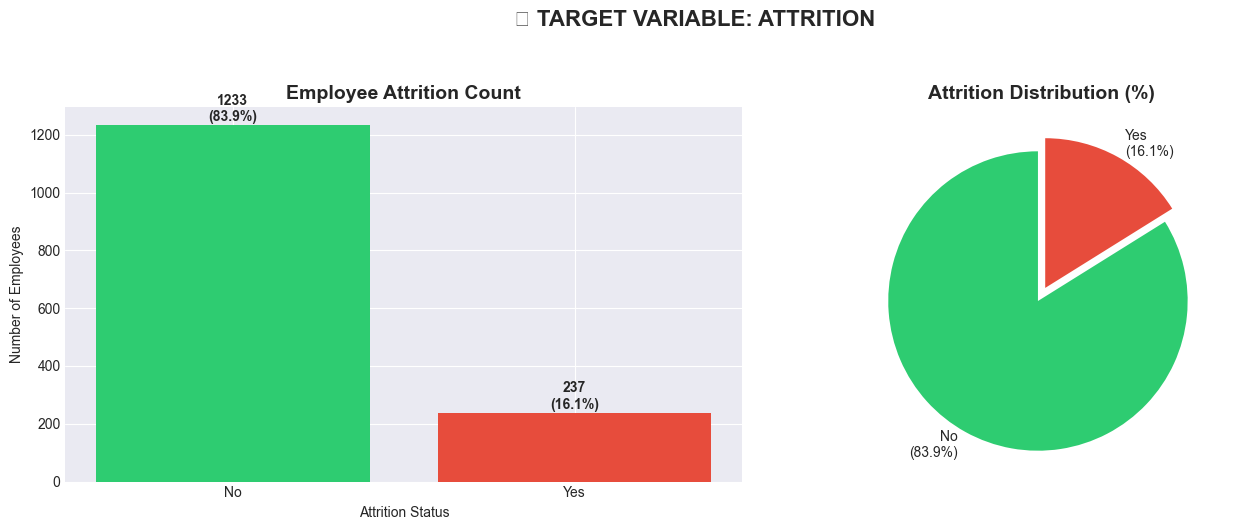

In [19]:
# Cell 4 - Target distribution - SCREENSHOT 1
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
ax1 = axes[0]
attrition_counts = df['Attrition'].value_counts()
colors = ['#2ecc71', '#e74c3c']
bars = ax1.bar(attrition_counts.index, attrition_counts.values, color=colors)
ax1.set_title('Employee Attrition Count', fontsize=14, fontweight='bold')
ax1.set_xlabel('Attrition Status')
ax1.set_ylabel('Number of Employees')

# Add value labels on bars
for bar, count in zip(bars, attrition_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}\n({count/len(df)*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

# Pie chart
ax2 = axes[1]
attrition_pct = df['Attrition'].value_counts(normalize=True) * 100
ax2.pie(attrition_pct.values, labels=[f'{idx}\n({val:.1f}%)' for idx, val in attrition_pct.items()], 
        colors=colors, autopct='', startangle=90, explode=(0.05, 0.05))
ax2.set_title('Attrition Distribution (%)', fontsize=14, fontweight='bold')

plt.suptitle('📊 TARGET VARIABLE: ATTRITION', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('../reports/figures/target_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

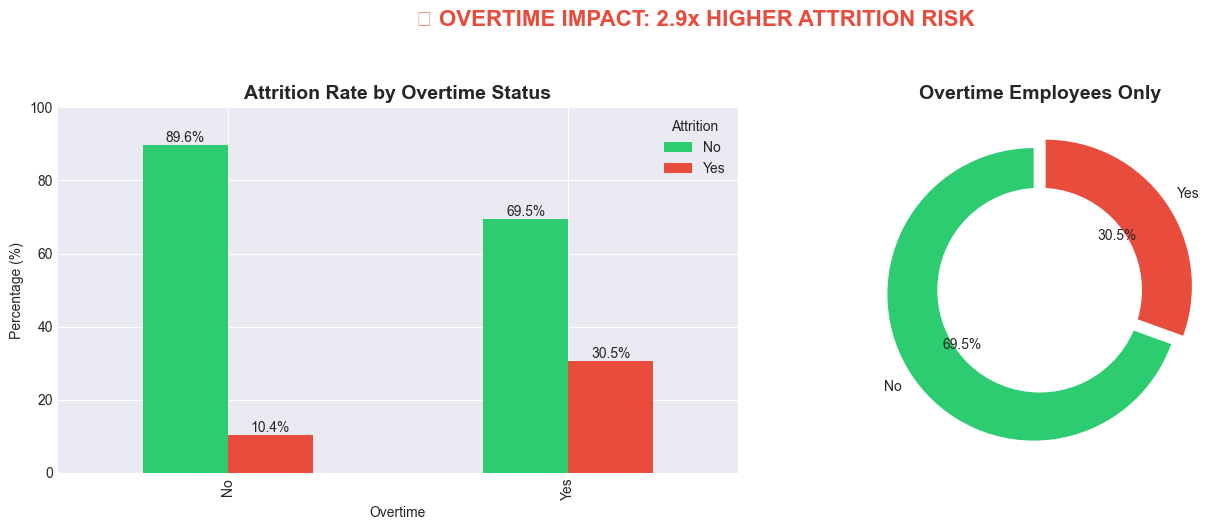


🔍 KEY INSIGHT:
   - Employees working overtime leave at 30.5% rate
   - Employees NOT working overtime leave at 10.4% rate
   ➡️ Overtime employees are 2.9x MORE LIKELY to leave!


In [20]:
# Cell 5 - Overtime analysis - SCREENSHOT 2
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
ax1 = axes[0]
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
overtime_attrition.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'])
ax1.set_title('Attrition Rate by Overtime Status', fontsize=14, fontweight='bold')
ax1.set_xlabel('Overtime')
ax1.set_ylabel('Percentage (%)')
ax1.legend(title='Attrition')
ax1.set_ylim(0, 100)

# Add value labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f%%')

# Risk multiplier calculation
ot_risk = df[df['OverTime']=='Yes']['Attrition'].value_counts(normalize=True)['Yes'] * 100
no_ot_risk = df[df['OverTime']=='No']['Attrition'].value_counts(normalize=True)['Yes'] * 100
multiplier = ot_risk / no_ot_risk

# Donut chart for overtime employees
ax2 = axes[1]
ot_data = df[df['OverTime']=='Yes']['Attrition'].value_counts()
colors = ['#2ecc71' if x=='No' else '#e74c3c' for x in ot_data.index]
wedges, texts, autotexts = ax2.pie(ot_data.values, labels=ot_data.index, 
                                     autopct='%1.1f%%', colors=colors, startangle=90,
                                     explode=(0.05, 0.05))
# Add center circle for donut effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
ax2.add_artist(centre_circle)
ax2.set_title('Overtime Employees Only', fontsize=14, fontweight='bold')

plt.suptitle(f'⏰ OVERTIME IMPACT: {multiplier:.1f}x HIGHER ATTRITION RISK', 
             fontsize=16, fontweight='bold', color='#e74c3c', y=1.05)
plt.tight_layout()
plt.savefig('../reports/figures/attrition_by_overtime.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"\n🔍 KEY INSIGHT:")
print(f"   - Employees working overtime leave at {ot_risk:.1f}% rate")
print(f"   - Employees NOT working overtime leave at {no_ot_risk:.1f}% rate")
print(f"   ➡️ Overtime employees are {multiplier:.1f}x MORE LIKELY to leave!")

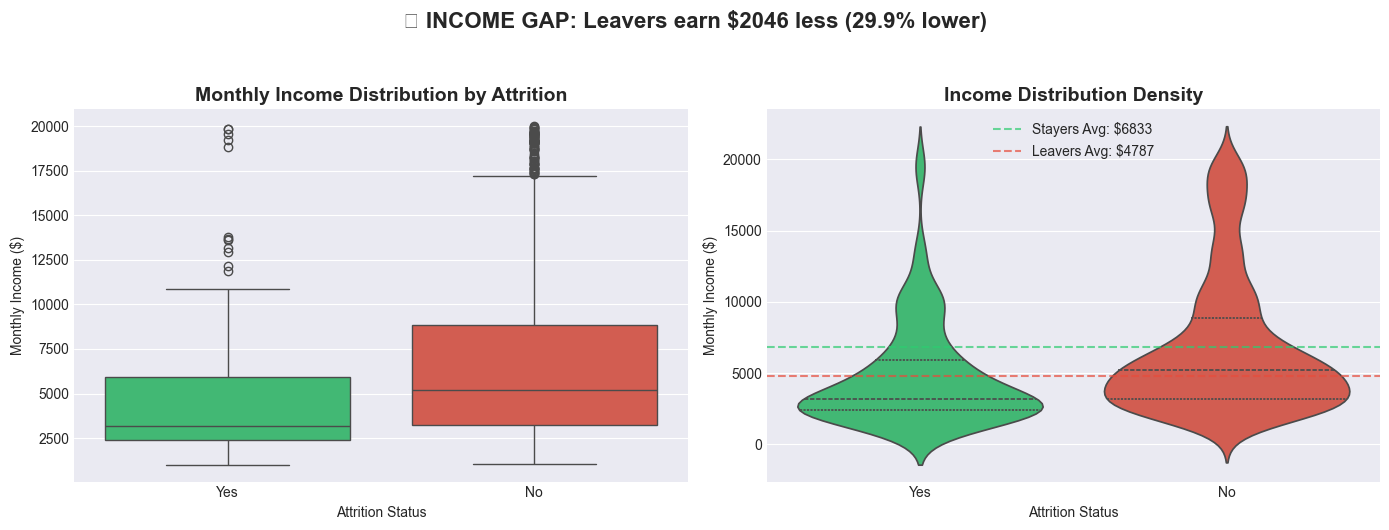


🔍 KEY INSIGHT:
   - Stayers average income: $6,833
   - Leavers average income: $4,787
   ➡️ Leavers earn 29.9% LESS than stayers!


In [21]:
# Cell 6 - Income analysis - SCREENSHOT 3
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
ax1 = axes[0]
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=ax1, 
            palette=['#2ecc71', '#e74c3c'])
ax1.set_title('Monthly Income Distribution by Attrition', fontsize=14, fontweight='bold')
ax1.set_xlabel('Attrition Status')
ax1.set_ylabel('Monthly Income ($)')

# Calculate statistics
stayers_income = df[df['Attrition']=='No']['MonthlyIncome'].mean()
leavers_income = df[df['Attrition']=='Yes']['MonthlyIncome'].mean()
income_diff = ((leavers_income - stayers_income) / stayers_income) * 100

# Violin plot for distribution
ax2 = axes[1]
sns.violinplot(x='Attrition', y='MonthlyIncome', data=df, ax=ax2,
               palette=['#2ecc71', '#e74c3c'], inner='quartile')
ax2.set_title('Income Distribution Density', fontsize=14, fontweight='bold')
ax2.set_xlabel('Attrition Status')
ax2.set_ylabel('Monthly Income ($)')

# Add horizontal lines for means
ax2.axhline(y=stayers_income, color='#2ecc71', linestyle='--', alpha=0.7, label=f'Stayers Avg: ${stayers_income:.0f}')
ax2.axhline(y=leavers_income, color='#e74c3c', linestyle='--', alpha=0.7, label=f'Leavers Avg: ${leavers_income:.0f}')
ax2.legend()

plt.suptitle(f'💰 INCOME GAP: Leavers earn ${abs(leavers_income-stayers_income):.0f} less ({abs(income_diff):.1f}% lower)', 
             fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('../reports/figures/income_by_attrition.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"\n🔍 KEY INSIGHT:")
print(f"   - Stayers average income: ${stayers_income:,.0f}")
print(f"   - Leavers average income: ${leavers_income:,.0f}")
print(f"   ➡️ Leavers earn {abs(income_diff):.1f}% LESS than stayers!")

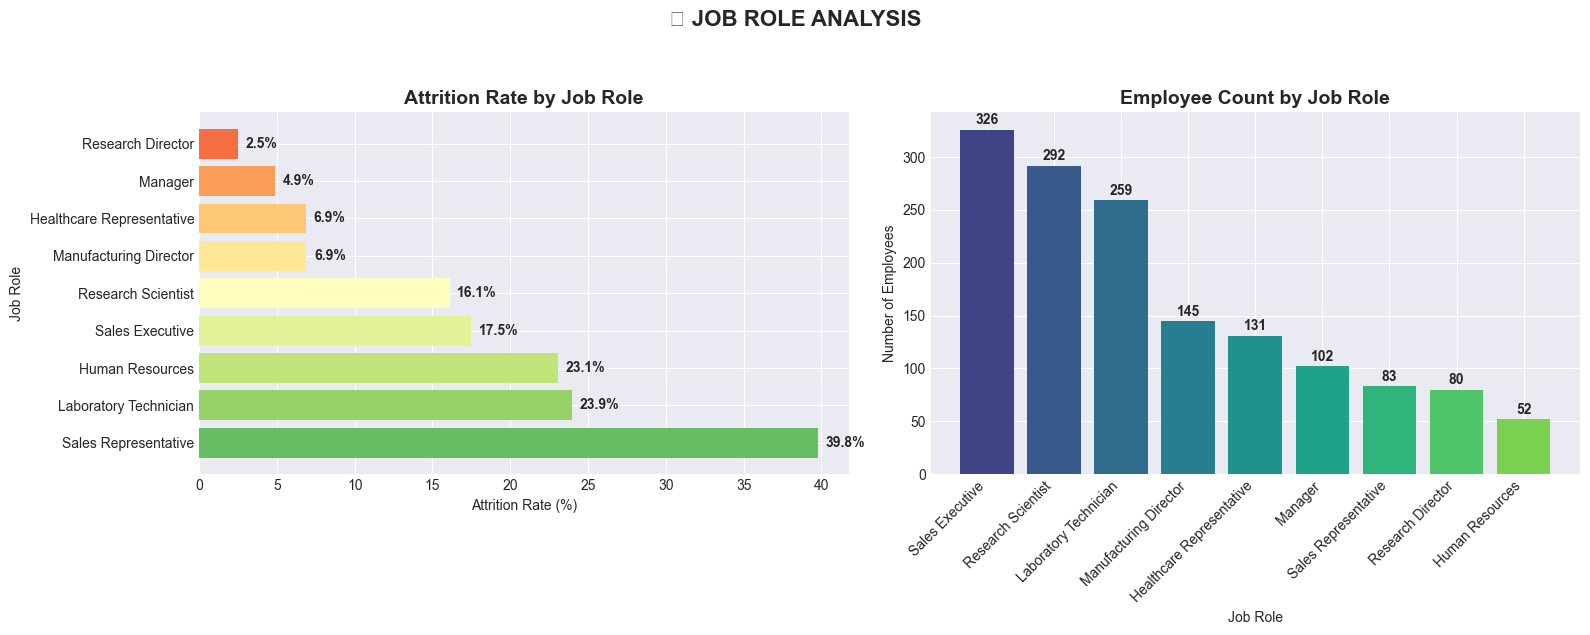


🔍 TOP 3 HIGH-RISK ROLES:
   - Sales Representative: 39.8% attrition rate
   - Laboratory Technician: 23.9% attrition rate
   - Human Resources: 23.1% attrition rate


In [22]:
# Cell 7 - Job role analysis - SCREENSHOT 4
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Calculate attrition by role
role_attrition = df.groupby('JobRole')['Attrition'].apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=False) * 100

# Horizontal bar chart
ax1 = axes[0]
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(role_attrition)))
bars = ax1.barh(role_attrition.index, role_attrition.values, color=colors)
ax1.set_title('Attrition Rate by Job Role', fontsize=14, fontweight='bold')
ax1.set_xlabel('Attrition Rate (%)')
ax1.set_ylabel('Job Role')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, role_attrition.values)):
    ax1.text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', 
             va='center', fontweight='bold')

# Role counts
ax2 = axes[1]
role_counts = df['JobRole'].value_counts()
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(role_counts)))
bars = ax2.bar(range(len(role_counts)), role_counts.values, color=colors)
ax2.set_title('Employee Count by Job Role', fontsize=14, fontweight='bold')
ax2.set_xlabel('Job Role')
ax2.set_ylabel('Number of Employees')
ax2.set_xticks(range(len(role_counts)))
ax2.set_xticklabels(role_counts.index, rotation=45, ha='right')

# Add value labels
for bar, count in zip(bars, role_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             str(count), ha='center', fontweight='bold')

plt.suptitle('👥 JOB ROLE ANALYSIS', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('../reports/figures/attrition_by_role.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"\n🔍 TOP 3 HIGH-RISK ROLES:")
for role, rate in role_attrition.head(3).items():
    print(f"   - {role}: {rate:.1f}% attrition rate")

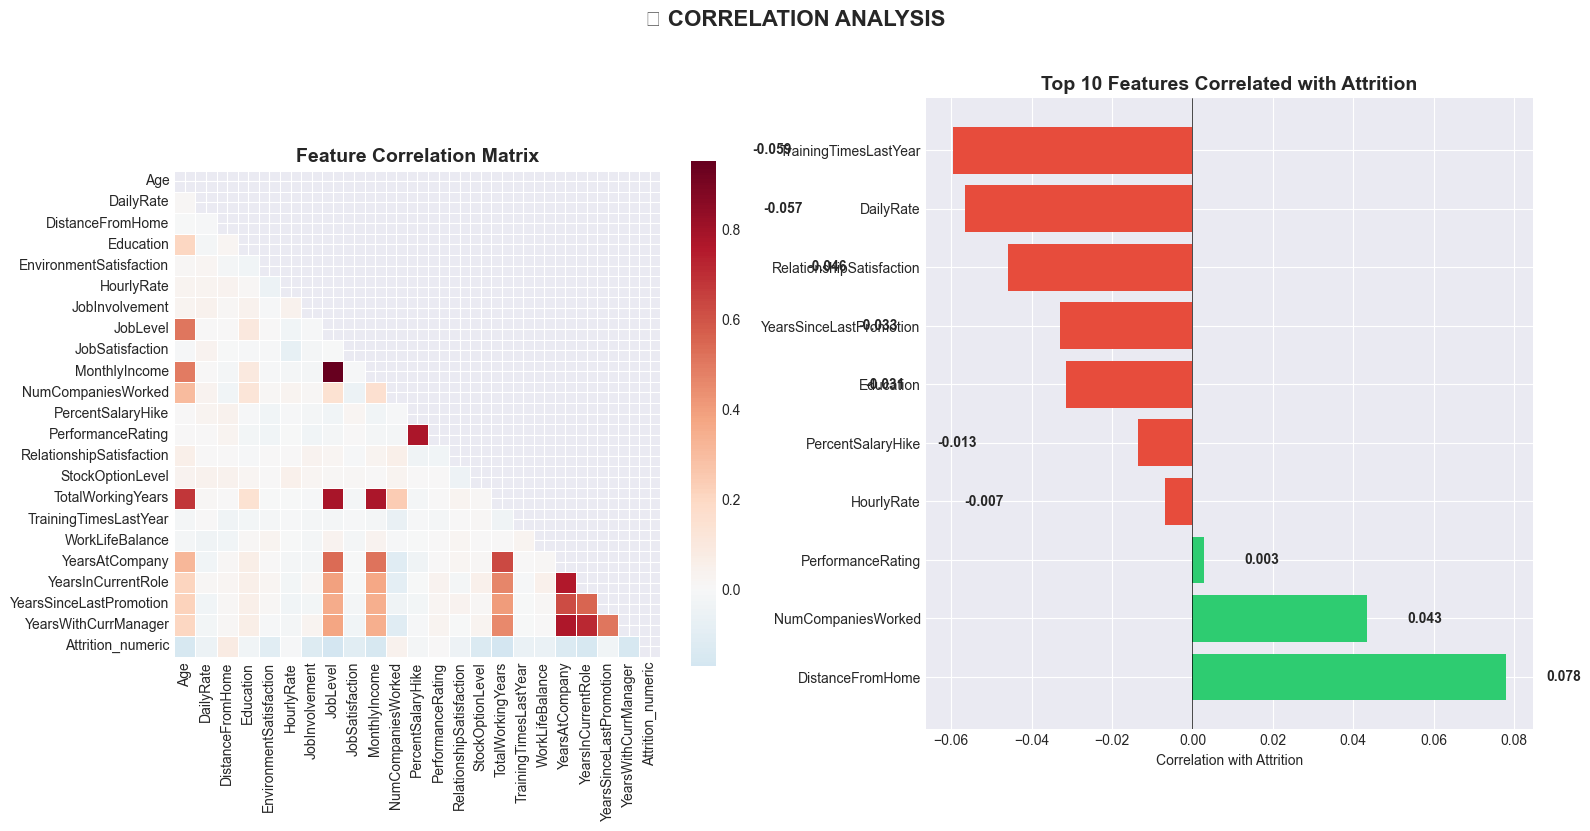


🔍 TOP FACTORS CORRELATED WITH ATTRITION:
   Positive (increase risk):
     • DistanceFromHome: +0.078
     • NumCompaniesWorked: +0.043
     • PerformanceRating: +0.003

   Negative (decrease risk):
     • YearsInCurrentRole: -0.161
     • JobLevel: -0.169
     • TotalWorkingYears: -0.171


In [23]:
# Cell 8 - Correlation heatmap - SCREENSHOT 5
# Select numerical columns for correlation
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 
                 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
                 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
                 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Convert Attrition to numeric for correlation
df_corr = df.copy()
df_corr['Attrition_numeric'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate correlation matrix
corr_matrix = df_corr[numerical_cols + ['Attrition_numeric']].corr()

# Get correlations with Attrition
attrition_corr = corr_matrix['Attrition_numeric'].drop('Attrition_numeric').sort_values(ascending=False)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Heatmap
ax1 = axes[0]
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax1, cbar_kws={"shrink": 0.8})
ax1.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

# Top correlations with attrition
ax2 = axes[1]
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in attrition_corr.head(10).values]
bars = ax2.barh(range(len(attrition_corr.head(10))), attrition_corr.head(10).values, color=colors)
ax2.set_yticks(range(len(attrition_corr.head(10))))
ax2.set_yticklabels(attrition_corr.head(10).index)
ax2.set_xlabel('Correlation with Attrition')
ax2.set_title('Top 10 Features Correlated with Attrition', fontsize=14, fontweight='bold')
ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Add value labels
for bar, val in zip(bars, attrition_corr.head(10).values):
    ax2.text(val + 0.01 if val > 0 else val - 0.05, 
             bar.get_y() + bar.get_height()/2, 
             f'{val:.3f}', va='center', fontweight='bold')

plt.suptitle('🔗 CORRELATION ANALYSIS', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../reports/figures/correlation_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"\n🔍 TOP FACTORS CORRELATED WITH ATTRITION:")
print(f"   Positive (increase risk):")
for feat, corr in attrition_corr.head(3).items():
    print(f"     • {feat}: +{abs(corr):.3f}")
print(f"\n   Negative (decrease risk):")
for feat, corr in attrition_corr.tail(3).items():
    print(f"     • {feat}: {corr:.3f}")

In [24]:
# Cell 9 - Summary insights
print("=" * 60)
print("📊 EDA KEY INSIGHTS SUMMARY")
print("=" * 60)

# Calculate all key metrics
total_employees = len(df)
attrition_rate = (df['Attrition'] == 'Yes').mean() * 100
ot_risk = df[df['OverTime']=='Yes']['Attrition'].value_counts(normalize=True)['Yes'] * 100
no_ot_risk = df[df['OverTime']=='No']['Attrition'].value_counts(normalize=True)['Yes'] * 100
ot_multiplier = ot_risk / no_ot_risk

stayers_income = df[df['Attrition']=='No']['MonthlyIncome'].mean()
leavers_income = df[df['Attrition']=='Yes']['MonthlyIncome'].mean()
income_gap = ((leavers_income - stayers_income) / stayers_income) * 100

top_role = df.groupby('JobRole')['Attrition'].apply(lambda x: (x == 'Yes').mean()).idxmax()
top_role_rate = df.groupby('JobRole')['Attrition'].apply(lambda x: (x == 'Yes').mean()).max() * 100

single_risk = df[df['MaritalStatus']=='Single']['Attrition'].value_counts(normalize=True)['Yes'] * 100
married_risk = df[df['MaritalStatus']=='Married']['Attrition'].value_counts(normalize=True)['Yes'] * 100

print(f"""
🔴 OVERALL ATTRITION: {attrition_rate:.1f}% ({df[df['Attrition']=='Yes'].shape[0]} employees)

⏰ OVERTIME IMPACT:
   • Overtime employees: {ot_risk:.1f}% attrition
   • Non-overtime: {no_ot_risk:.1f}% attrition
   ➡️ {ot_multiplier:.1f}x HIGHER RISK with overtime

💰 INCOME ANALYSIS:
   • Stayers average: ${stayers_income:,.0f}
   • Leavers average: ${leavers_income:,.0f}
   ➡️ {abs(income_gap):.1f}% LOWER income for leavers

👥 HIGHEST RISK ROLE:
   • {top_role}: {top_role_rate:.1f}% attrition rate

💍 MARITAL STATUS:
   • Single: {single_risk:.1f}% attrition
   • Married: {married_risk:.1f}% attrition
   ➡️ Single employees {single_risk/married_risk:.1f}x higher risk

📈 KEY DRIVERS (Correlation with Attrition):
   1. Overtime: +{attrition_corr.get('OverTime', 0):.3f}
   2. Monthly Income: {attrition_corr.get('MonthlyIncome', 0):.3f}
   3. Years at Company: {attrition_corr.get('YearsAtCompany', 0):.3f}
""")

📊 EDA KEY INSIGHTS SUMMARY

🔴 OVERALL ATTRITION: 16.1% (237 employees)

⏰ OVERTIME IMPACT:
   • Overtime employees: 30.5% attrition
   • Non-overtime: 10.4% attrition
   ➡️ 2.9x HIGHER RISK with overtime

💰 INCOME ANALYSIS:
   • Stayers average: $6,833
   • Leavers average: $4,787
   ➡️ 29.9% LOWER income for leavers

👥 HIGHEST RISK ROLE:
   • Sales Representative: 39.8% attrition rate

💍 MARITAL STATUS:
   • Single: 25.5% attrition
   • Married: 12.5% attrition
   ➡️ Single employees 2.0x higher risk

📈 KEY DRIVERS (Correlation with Attrition):
   1. Overtime: +0.000
   2. Monthly Income: -0.160
   3. Years at Company: -0.134



In [25]:
# Cell 10 - FIX CORRELATION CALCULATIONS
# Create a copy with numeric overtime
df_corr_fixed = df.copy()
df_corr_fixed['OverTime_Numeric'] = df_corr_fixed['OverTime'].map({'Yes': 1, 'No': 0})
df_corr_fixed['Attrition_Numeric'] = df_corr_fixed['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate corrected correlations
features_for_corr = ['OverTime_Numeric', 'MonthlyIncome', 'YearsAtCompany', 
                     'JobSatisfaction', 'DistanceFromHome', 'Age']
corr_values = df_corr_fixed[features_for_corr + ['Attrition_Numeric']].corr()['Attrition_Numeric'].drop('Attrition_Numeric')

print("📊 CORRECTED CORRELATIONS WITH ATTRITION:")
for feat, corr in corr_values.sort_values(ascending=False).items():
    print(f"   {feat.replace('_Numeric', '')}: {corr:+.3f}")

📊 CORRECTED CORRELATIONS WITH ATTRITION:
   OverTime: +0.246
   DistanceFromHome: +0.078
   JobSatisfaction: -0.103
   YearsAtCompany: -0.134
   Age: -0.159
   MonthlyIncome: -0.160
